Data Cleaning for Thyroid cancer.

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\OneDrive\\Documents\\vscode-projects\\Thyroid-Risk-Analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Compu\\OneDrive\\Documents\\vscode-projects\\Thyroid-Risk-Analysis'

# Section 1 :  Data Extraction, Transformation, and Loading (ETL)

Setting up & Importing Python packages that we will be using in this project to carry out the analysis. For example Numpy to compute numerical operations and handle arrays, Pandas for data manipulation and analysis, Matplotlib, Seaborn and Plotly to create different data visualisations.

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

Data Extraction

Loading the CSV dataset containing the data collected previously and extracting it into dataframe using pd.read_csv() function.

In [5]:
df = pd.read_csv('thyroid_cancer_risk_data.csv')

Data Cleaning, Tranformation & Analysis 

Next checking the general information regarding the data such as column names, datatypes of columns, number of entries and the memory space used through .info() method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

Reviewing top 5 entries in dataset to get a general overview of the dataset with .head() method

In [7]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


Checking for missing values

In [8]:
df.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

Checking for each Column's datatype

In [9]:
df.dtypes

Patient_ID               int64
Age                      int64
Gender                  object
Country                 object
Ethnicity               object
Family_History          object
Radiation_Exposure      object
Iodine_Deficiency       object
Smoking                 object
Obesity                 object
Diabetes                object
TSH_Level              float64
T3_Level               float64
T4_Level               float64
Nodule_Size            float64
Thyroid_Cancer_Risk     object
Diagnosis               object
dtype: object

Checking for any duplicate values in data

In [10]:
duplicate_check = df.duplicated().any()
print('There are duplicate entries:', duplicate_check,'.')

There are duplicate entries: False .


In [11]:
# Check missing values
df.isnull().sum()  # Shows count of missing values per column

# Cleaning any empty values to 0 for easier numeric computation
df.fillna(0)  # Fill all missing values with 0

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


Dropping the patient ID column to anonimise the data with .drop() method and then rechecking if it has been dropped with .head() method.

In [12]:
df = df.drop(columns=["Patient_ID"])
df.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


Generating a summary of the statistics of the dataset such mean, total count of entries,minimum and maximum values.

In [13]:
df.describe()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,51.918497,5.045102,2.001727,8.246204,2.503403
std,21.632815,2.860264,0.866248,2.164188,1.444631
min,15.000000,0.100000,0.500000,4.500000,0.000000
25%,33.000000,2.570000,1.250000,6.370000,1.250000
50%,52.000000,5.040000,2.000000,8.240000,2.510000
75%,71.000000,7.520000,2.750000,10.120000,3.760000
max,89.000000,10.000000,3.500000,12.000000,5.000000


Save the cleaned dataset with the same name in the same directory after data cleaning and processing (dropping the Patient_ID column, etc...):

In [14]:
df.to_csv('thyroid_cancer_risk_data_cleaned.csv', index=False)


---

# Section 2

Hypothesis 2: Age and gender influence thyroid cancer risk, with older individuals and females having a higher probability.

Validation: Use box plots and regression analysis to explore how cancer risk varies across different age groups and gender distributions.
Logistic Regression Modeling: Fitting a logistic regression model to quantify the effect of age and gender on thyroid cancer probability.



In [15]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Convert categorical variables to numerical values
df['Thyroid_Cancer_Risk_Numeric'] = df['Thyroid_Cancer_Risk'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Gender_Binary'] = df['Gender'].map({'Female': 1, 'Male': 0})

# Define independent variables (without intercept)
X_ordinal = df[['Age', 'Gender_Binary']]

# Fit ordinal logistic regression model
ordinal_model = OrderedModel(df['Thyroid_Cancer_Risk_Numeric'], X_ordinal, distr='logit')
ordinal_result = ordinal_model.fit(method='bfgs')

# Display the summary of results
print(ordinal_result.summary())

Optimization terminated successfully.
         Current function value: 0.994911
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
                                  OrderedModel Results                                 
Dep. Variable:     Thyroid_Cancer_Risk_Numeric   Log-Likelihood:            -2.1161e+05
Model:                            OrderedModel   AIC:                         4.232e+05
Method:                     Maximum Likelihood   BIC:                         4.233e+05
Date:                         Fri, 07 Feb 2025                                         
Time:                                 14:30:10                                         
No. Observations:                       212691                                         
Df Residuals:                           212687                                         
Df Model:                                    2                                         
                    coef    std err 

Interpretation: Odds Ratio (OR) Interpretation:

If exp(Gender_Binary) = 1.018, it means that females have 1.8% higher odds of being classified into a higher thyroid cancer risk category compared to males, holding age constant.
If exp(Age) = 1.0003, it means that each additional year of age increases the odds of being in a higher thyroid cancer risk category by 0.03%, which is very small and not statistically significant (p = 0.133).
Confidence Interval (CI):

The 95% CI for gender (1.001 to 1.035) means we are 95% confident that the true effect lies within this range.
The 95% CI for age (1.000 to 1.001) suggests very little change in risk per year of age, meaning age might not be a strong predictor.

What does this actually mean in real-world terms?

Gender Influence: The model suggests that females have a slightly higher risk of being classified into a higher thyroid cancer risk group.

This aligns with real-world medical studies, where women are more likely to develop thyroid nodules and thyroid cancer.
However, the effect size (1.8% increase) is small.
Age Influence: The effect of age is statistically insignificant, meaning age alone does not strongly predict thyroid cancer risk in this dataset.

This might be because age interacts with other factors, such as radiation exposure, family history, or hormonal differences.

# Plot Gender Proportion in Thyroid Cancer Risk

In [16]:
import ipywidgets as widgets
from IPython.display import display

# Function to predict thyroid cancer risk
def predict_thyroid_risk(age, gender='Female'):
    gender_binary = 1 if gender == 'Female' else 0
    
    log_odds_low_medium = ordinal_result.params['Age'] * age + ordinal_result.params['Gender_Binary'] * gender_binary + ordinal_result.params['1/2']
    log_odds_medium_high = ordinal_result.params['Age'] * age + ordinal_result.params['Gender_Binary'] * gender_binary + ordinal_result.params['2/3']
    
    prob_low = 1 / (1 + np.exp(-log_odds_low_medium))
    prob_medium = 1 / (1 + np.exp(-log_odds_medium_high)) - prob_low
    prob_high = 1 - (prob_low + prob_medium)
    
    return prob_low, prob_medium, prob_high

# Create interactive widgets
age_slider = widgets.IntSlider(min=15, max=90, value=30, description="Age:")
gender_dropdown = widgets.Dropdown(options=["Female", "Male"], value="Female", description="Gender:")
output = widgets.Output()

# Function to update prediction
def update_prediction(change):
    with output:
        output.clear_output()
        age = age_slider.value
        gender = gender_dropdown.value
        prob_low, prob_medium, prob_high = predict_thyroid_risk(age, gender)
        display(f"For Age: {age}, Gender: {gender}")
        display(f"Probability of Low Risk: {prob_low:.4f}")
        display(f"Probability of Medium Risk: {prob_medium:.4f}")
        display(f"Probability of High Risk: {prob_high:.4f}")

# Attach event handlers
age_slider.observe(update_prediction, names="value")
gender_dropdown.observe(update_prediction, names="value")

# Display widgets and output
display(age_slider, gender_dropdown, output)

IntSlider(value=30, description='Age:', max=90, min=15)

Dropdown(description='Gender:', options=('Female', 'Male'), value='Female')

Output()

In [17]:
# Update the prediction initially
update_prediction(None)

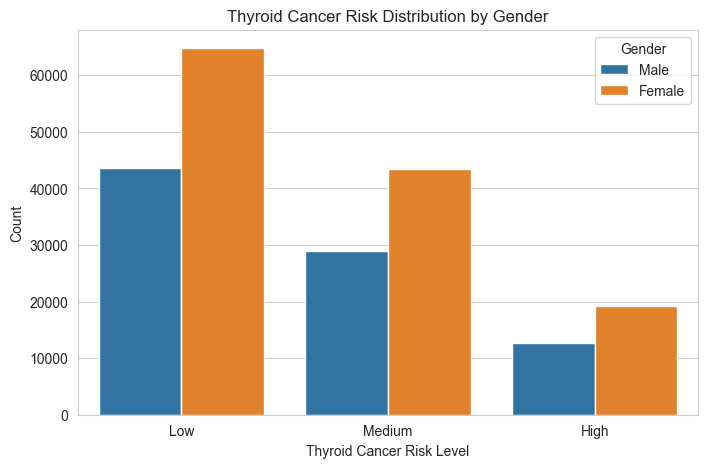

In [18]:
# Plot Gender Proportion in Thyroid Cancer Risk
plt.figure(figsize=(8, 5))
sns.countplot(x='Thyroid_Cancer_Risk', hue='Gender', data=df)
plt.title("Thyroid Cancer Risk Distribution by Gender")
plt.xlabel("Thyroid Cancer Risk Level")
plt.ylabel("Count")
plt.show()

# Plot Age Distribution by Thyroid Cancer Risk

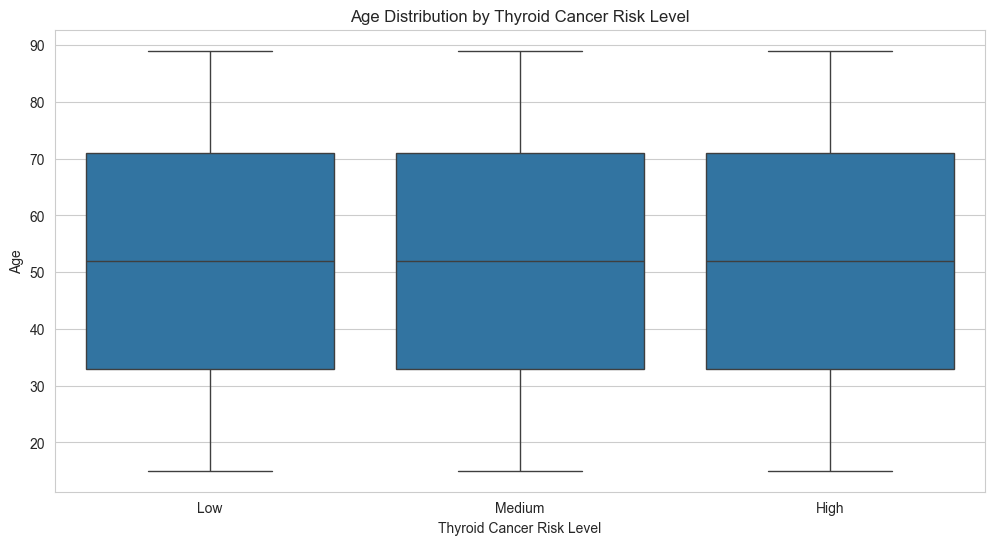

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Thyroid_Cancer_Risk'], y=df['Age'])
plt.title("Age Distribution by Thyroid Cancer Risk Level")
plt.xlabel("Thyroid Cancer Risk Level")
plt.ylabel("Age")
plt.show()

Hypothesis 3: Certain countries and ethnicities have a higher prevalence of thyroid cancer due to genetic and environmental factors.

Key Goals:

Identify high-risk regions where thyroid cancer is more prevalent.
Analyze variations in thyroid cancer risk across different countries.
Support health policy and decision-making by providing a data-driven overview of thyroid cancer risk worldwide.


# Calculate the proportion of each risk level for each country

The following code Compute Proportion of Each Risk Level by Country by ( Grouping the data by country and risk level (Low, Medium, High).
Computing the number of individuals per risk level (Count).
Computing total individuals per country (Total).
Calculating the percentage of each risk level per country (Proportion).)

Final Deliverable: An interactive visual analytics dashboard to communicate insights effectively.


In [20]:
cancer_cases_by_country = df.groupby(["Country", "Thyroid_Cancer_Risk"]).size().reset_index(name="Count")
total_counts = df.groupby("Country").size().reset_index(name="Total")
cancer_cases_by_country = cancer_cases_by_country.merge(total_counts, on="Country")
cancer_cases_by_country["Proportion"] = (cancer_cases_by_country["Count"] / cancer_cases_by_country["Total"]) * 100  # Convert to percentage

The following code is create A custom Green-Yellow-Red scale:
Green (Low Risk)
Yellow (Medium Risk)
Red (High Risk)
Purpose: Helps in visually distinguishing risk levels on the map.

In [21]:
custom_color_scale = [[0.0, "green"], [0.5, "yellow"], [1.0, "red"]]

The Following Code is to create an interactive choropleth visualization showing how different risk levels are distributed across the world: Creates a world map for each risk level (Low, Medium, High).
Uses facet_row="Thyroid_Cancer_Risk" → Each risk level is displayed as a separate stacked map.
Uses the custom color scale to visualize proportions

In [22]:
fig_geo = px.choropleth(
    cancer_cases_by_country,
    locations="Country",
    locationmode="country names",
    color="Proportion",
    facet_row="Thyroid_Cancer_Risk",  # Stack maps vertically
    color_continuous_scale=custom_color_scale,  # Apply the custom color scale
    title="Geospatial Distribution of Thyroid Cancer Risk by Level",
    labels={"Proportion": "Proportion of Risk Level (%)"}  # Update label to show percentage
)

In [23]:

fig_geo.update_layout(
    coloraxis=dict(
        colorbar=dict(
            title="Risk Proportion (%)",
            tickvals=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],  # More precise percentage values
            ticktext=["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"],  # Explicit numeric labels in percentage
             tickfont=dict(size=16)  # Increase font size for tick labels
        )
    ),
    height=1600,  # Increase figure height for larger maps
    margin={"r": 0, "t": 40, "l": 0, "b": 0}
)

fig_geo.show()


Interpretation:

Most countries show a similar risk distribution:
Low risk (~53-54%) is the most common category.
Medium risk (~35-36%) follows.
High risk (~10-11%) is the least frequent in most countries.
This suggests that thyroid cancer risk is generally low in most global regions.

India Shows a Unique Risk Pattern
High-risk individuals make up 32.86% of the population (significantly higher than other countries).
Medium risk (26.86%) is lower than most other countries.
Low risk (40.28%) is lower compared to other nations (~53%).
Possible explanation: India may have environmental or genetic factors contributing to higher thyroid cancer risk.

Countries such as Brazil, China, Germany, Japan, Nigeria, Russia, South Korea, UK, and USA all follow a pattern:
High risk is ~10-11%.
Medium risk is ~35-36%.
Low risk is ~53-54%.
This suggests similar healthcare screening, environmental exposure, or dietary factors across these countries.


Japan (10.06%) and South Korea (10.50%) have the lowest high-risk proportions.
This could be due to:
Better preventive healthcare (e.g., early thyroid screening).
Dietary factors (higher iodine intake from seafood).
Genetic factors reducing risk.

& Western Countries (UK & USA) Show Similar Trends. 

---

**Section 3**

## Checking the data for any bias in any of the classes

Bias in data can significantly affect the outcomes and interpretations of our analysis. It is crucial to identify and address any biases to ensure the validity and fairness of our results. In this section, we will check for potential biases in the dataset across different classes such as gender, age, ethnicity, and family history.

In [27]:
# Analyze demographic representation
data = pd.read_csv('thyroid_cancer_risk_data_cleaned.csv')

demographic_counts = data['Ethnicity'].value_counts()
print(demographic_counts)

Ethnicity
Caucasian         63669
Asian             53261
African           42414
Hispanic          32012
Middle Eastern    21335
Name: count, dtype: int64


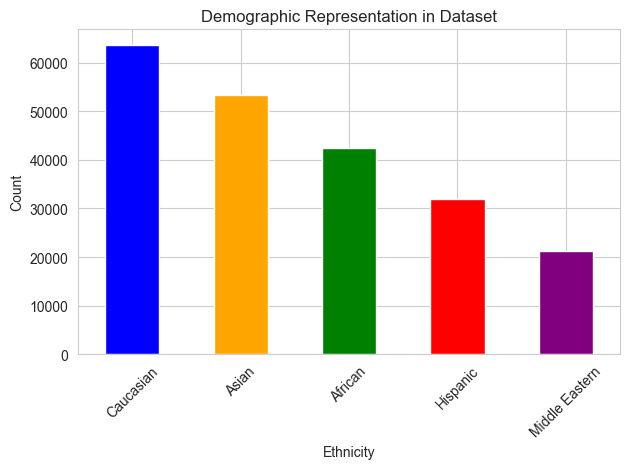

In [28]:
#Visualize the demographic distribution

# Plot demographic representation
demographic_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Demographic Representation in Dataset')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The dataset is highly demographic, showing five ethnic groups: Caucasian, Asian, African, Hispanic, and Middle Eastern. 

* The Caucasians are the most represented group, with 63,669 entries, while the Middle Eastern individuals are the least represented, with only 21,335 entries. The Asians come in with 53,261 entries, Africans with 42,414 entries, and Hispanics with 32,012 entries, showing an uneven distribution.

* This, therefore, creates an imbalance that might affect predictive modeling or research. Such models perform way better if this data is over-representative for groups like Caucasians and Asians while performing poorly for groups such as the Middle Eastern and Hispanic populations. The insights drawn from this data may also not generalize well across the whole population; therefore, these might be biased or lead to inequity.

* This can be further balanced by collecting more data from underrepresented groups. Other techniques that can be used to reduce bias include oversampling and the generation of synthetic data. Model performance evaluation across demographic groups and the inclusion of fairness metrics in the evaluation frameworks are crucial steps toward ensuring equity.

* Transparency in documenting the limitations of the dataset and regular audits for fairness are key to ethical standards in data-driven applications.

<Figure size 1000x500 with 0 Axes>

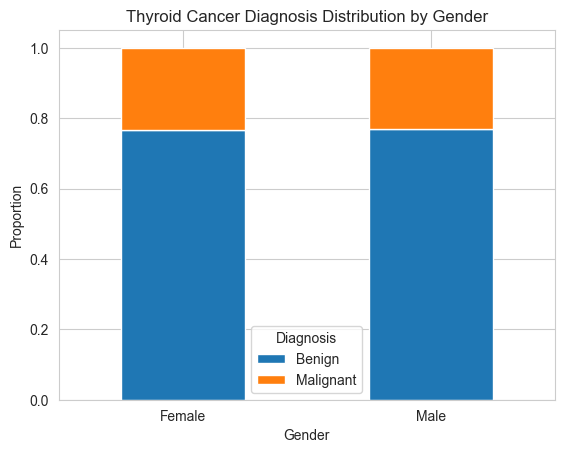

Gender Distribution:
 Gender
Female    0.599588
Male      0.400412
Name: proportion, dtype: float64

Diagnosis Proportions by Gender:
 Diagnosis    Benign  Malignant
Gender                        
Female     0.766794   0.233206
Male       0.768036   0.231964

Chi-squared test p-value: 0.5102


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Check for bias in the dataset regarding gender representation

# Load dataset with correct filename
df = pd.read_csv('thyroid_cancer_risk_data.csv')

# 1. Gender distribution analysis
gender_dist = df['Gender'].value_counts(normalize=True)

# 2. Diagnosis distribution by gender
diagnosis_dist = pd.crosstab(df['Gender'], df['Diagnosis'], normalize='index')

# 3. Statistical significance test
contingency_table = pd.crosstab(df['Gender'], df['Diagnosis'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 4. Visualization
plt.figure(figsize=(10,5))
diagnosis_dist.plot(kind='bar', stacked=True)
plt.title('Thyroid Cancer Diagnosis Distribution by Gender')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

print("Gender Distribution:\n", gender_dist)
print("\nDiagnosis Proportions by Gender:\n", diagnosis_dist)
print(f"\nChi-squared test p-value: {p:.4f}")

This result does not show any evidence of gender bias in the diagnosis of thyroid cancer in the dataset:

1. **Distribution of Genders**:
   - Female: 59.96%
   - Male: 40.04%

2. **Proportion in Diagnosis by Genders**:
   - Female: 76.68% Benign, 23.32% Malignant
   - Male: 76.80% Benign, 23.20% Malignant

3. **Statistical Test**:
   - Chi-square test p-value = 0.5102 (p > 0.05), which means no statistically significant difference in the diagnosis proportions across the genders.

4. **Visualization:
The bar chart confirms that the proportions of benign and malignant diagnoses are almost identical for both genders, confirming the conclusion there is no gender bias.

Based on this analysis, it can be concluded that this data does not show gender bias in the diagnosis outcome of thyroid cancer.

<Figure size 1000x500 with 0 Axes>

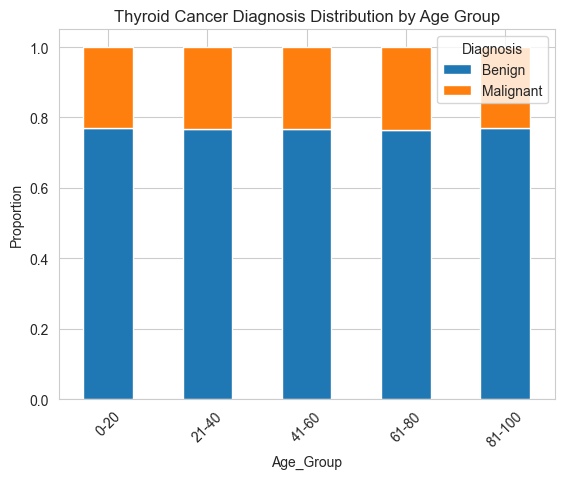

Age Group Distribution:
 Age_Group
21-40     0.267971
41-60     0.266800
61-80     0.266748
81-100    0.118167
0-20      0.080314
Name: proportion, dtype: float64

Diagnosis Proportions by Age Group:
 Diagnosis    Benign  Malignant
Age_Group                     
0-20       0.769992   0.230008
21-40      0.766839   0.233161
41-60      0.767508   0.232492
61-80      0.765453   0.234547
81-100     0.770143   0.229857

Chi-squared test p-value for age groups: 0.5586


In [31]:
# Load dataset
df = pd.read_csv('thyroid_cancer_risk_data_cleaned.csv')  # Update path if needed

# Create age groups for analysis
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# 1. Age group distribution analysis
age_dist = df['Age_Group'].value_counts(normalize=True)

# 2. Diagnosis distribution by age group
diagnosis_dist_age = pd.crosstab(df['Age_Group'], df['Diagnosis'], normalize='index')

# 3. Statistical significance test for age groups
contingency_table_age = pd.crosstab(df['Age_Group'], df['Diagnosis'])
chi2_age, p_age, dof_age, expected_age = chi2_contingency(contingency_table_age)

# 4. Visualization
plt.figure(figsize=(10,5))
diagnosis_dist_age.plot(kind='bar', stacked=True)
plt.title('Thyroid Cancer Diagnosis Distribution by Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

print("Age Group Distribution:\n", age_dist)
print("\nDiagnosis Proportions by Age Group:\n", diagnosis_dist_age)
print(f"\nChi-squared test p-value for age groups: {p_age:.4f}")

The analysis does not show any bias in thyroid cancer diagnosis based on age groups within this dataset. Diagnosis outcomes (benign vs. malignant) appear consistent across all age ranges, as supported by the high p-value and similar proportions in each group.

Percentage Distribution of Thyroid Cancer Risk by Family History:


Thyroid_Cancer_Risk,High,Low,Medium
Family_History,,,
No,7.843295,55.245657,36.911048
Yes,31.691344,40.965139,27.343517


<Figure size 1000x600 with 0 Axes>

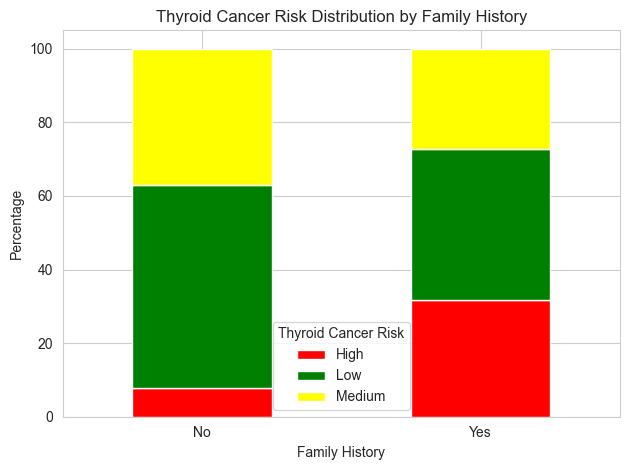

Chi-squared test p-value for family history: 0.0000
There is a statistically significant association between family history and thyroid cancer risk.


In [32]:
# Load and analyze family history bias
data = pd.read_csv('thyroid_cancer_risk_data.csv')

# Calculate risk distribution
risk_distribution = data.groupby(['Family_History', 'Thyroid_Cancer_Risk']).size().unstack(fill_value=0)
percentage_distribution = risk_distribution.div(risk_distribution.sum(axis=1), axis=0) * 100

# Display the percentage distribution
print("Percentage Distribution of Thyroid Cancer Risk by Family History:")
display(percentage_distribution)

# Visualize the distribution
plt.figure(figsize=(10, 6))
percentage_distribution.plot(kind='bar', stacked=True, color=['red', 'green', 'yellow'])
plt.title('Thyroid Cancer Risk Distribution by Family History')
plt.xlabel('Family History')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Thyroid Cancer Risk')
plt.tight_layout()
plt.show()

# Statistical significance test
contingency_table_family_history = pd.crosstab(data['Family_History'], data['Thyroid_Cancer_Risk'])
chi2_family_history, p_family_history, dof_family_history, expected_family_history = chi2_contingency(contingency_table_family_history)

print(f"Chi-squared test p-value for family history: {p_family_history:.4f}")

# Interpretation
if p_family_history < 0.05:
    print("There is a statistically significant association between family history and thyroid cancer risk.")
else:
    print("There is no statistically significant association between family history and thyroid cancer risk.")

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
